**Неделя 1. Домашнее задание**

In [1]:
# Считывание CSV файла в формате словаря
import csv
from collections import defaultdict

with open('titanic.csv', newline='') as csvfile: 
    titanic_reader = csv.DictReader(csvfile)
    titanic_lst = []
    for row in titanic_reader:
        titanic_lst.append(row)

titanic_dict = defaultdict(list)
for row in titanic_lst:
    for item in row.items():
        titanic_dict[item[0]].append(item[1])

**Задание 1**:  
Преобразуйте колонку 'Survived' в тип int без применения библиотеки numpy. Сумму по всему столбцу запишите в поле ответа.

In [2]:
titanic_dict['Survived'] = [int(i) for i in titanic_dict['Survived']]

In [3]:
sum(titanic_dict['Survived'])

342

**Задание 2:**  
Посчитайте количество пассажиров с родственниками ('Siblings/Spouses Aboard') в количестве более 3.

In [4]:
import numpy as np
# Преобразуем типы целых и вещественных колонок
for t, columns in {'int':['Survived', 'Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], 
                   'float':['Age', 'Fare']}.items():
    for col in columns:
        titanic_dict[col] = np.array(titanic_dict[col]).astype(t)

In [5]:
sum([1 for i in titanic_dict['Siblings/Spouses Aboard'] if i > 3])

30

**Задание 3:**  
3.1. Средний возраст мужчин.  
3.2. Средний возраст женщин.  
3.3. Доля выживших мужчин среди всех мужчин.  
3.4. Доля выживших женщин среди всех женщин.  

In [6]:
# male=1, female=0
len_dict = len(titanic_dict['Sex'])
for i in range(len_dict):
    if titanic_dict['Sex'][i] == 'male':
        titanic_dict['Sex'][i] = 1
    else:
        titanic_dict['Sex'][i] = 0

In [7]:
for i in np.unique(titanic_dict['Sex']):
    age = titanic_dict['Age'][np.where(titanic_dict['Sex']==i)[0]]
    survived = titanic_dict['Survived'][np.where(titanic_dict['Sex']==i)[0]]
    uniq, cnt = np.unique(survived, return_counts=True)
    
    print('Пол {}\n'.format('female' if i == 0 else 'male'))
    print('Средний возраст: {}'.format(sum(age)/age.size))
    print('Доля выживших: {}\n'.format(cnt[1]/survived.size))

Пол female

Средний возраст: 27.719745222929937
Доля выживших: 0.7420382165605095

Пол male

Средний возраст: 30.431361256544506
Доля выживших: 0.19022687609075042



**Задание 4:**  
Построить распределения возрастов мужчин и женщин в отдельных графиках и раскрасить выживших и не выживших в разные цвета. В качества ответа прикрепите 2 картинки с графиками или одну с 2-мя графиками.

In [8]:
import matplotlib.pyplot as plt

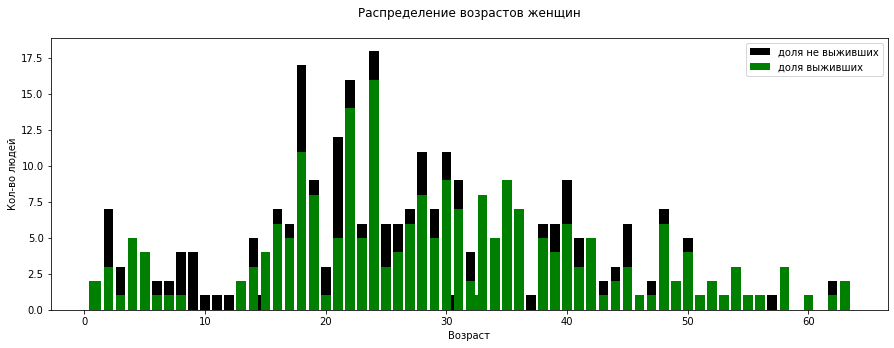

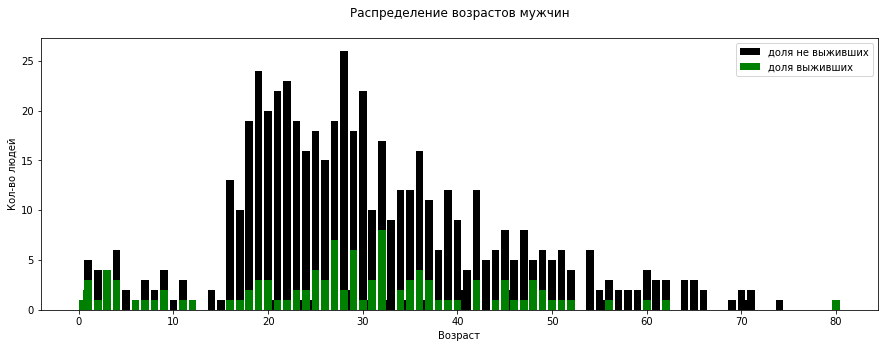

In [9]:
from collections import Counter
for i in np.unique(titanic_dict['Sex']):
    age = titanic_dict['Age'][np.where(titanic_dict['Sex']==i)[0]]
    survived = titanic_dict['Survived'][np.where(titanic_dict['Sex']==i)[0]]
    counter = Counter()
    counter_surv = Counter()
    
    for item in range(len(age)):
        counter[age[item]] += 1
        if survived[item] == 1:
            counter_surv[age[item]] += 1
        else:
            counter_surv[age[item]] += 0
            
    counter = dict(counter)
    counter_surv = dict(counter_surv)

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.bar(counter.keys(), counter.values(), color='black')
    ax.bar(counter_surv.keys(), counter_surv.values(), color='green')
    plt.xlabel('Возраст')
    plt.ylabel('Кол-во людей')
    plt.legend(['доля не выживших', 'доля выживших'])
    plt.title('Распределение возрастов {}\n'.format('женщин' if i == 0 else 'мужчин'))
    plt.show()